# Sampling Assignment
Name : Ananya Thomas<BR>
Roll No : 102017024<BR>
Sub Group : CSE 1


## Introduction

In this assignment I will be :
* Converting a highly imbalanced data into a balanced data.
* Creating five samples using five different sampling techniques.
* Applying five different machine learning models on all the five samples.
* Comparing the accuracies and determining the most optimal model.

## Reading the data

In [653]:
import pandas as pd
import numpy as np
import math
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [654]:
df = pd.read_csv("/content/Creditcard_data.csv")

In [655]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Balancing the dataset

In [656]:
df["Class"].value_counts()

0    763
1      9
Name: Class, dtype: int64

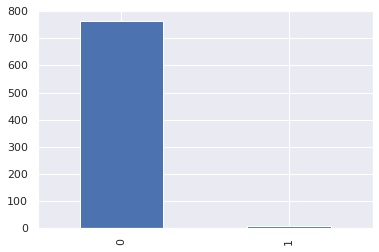

In [657]:
df['Class'].value_counts().plot(kind='bar')

In [658]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [659]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X,Y = oversample.fit_resample(X,Y)

In [660]:
Y.value_counts()

0    763
1    763
Name: Class, dtype: int64

In [661]:
df_oversampled = pd.concat([pd.DataFrame(X), pd.DataFrame(Y)],axis = 1)

In [662]:
df_oversampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [663]:
df_oversampled["Class"].value_counts()

0    763
1    763
Name: Class, dtype: int64

In [664]:
s1 = []
s2 = []
s3 = []
s4 = []
s5 = []

## Simple Random Sampling

### Sample size calculation

In [665]:
z = 1.96
p = 0.5
e = 0.05
n = round(math.pow(z,2)*p*(1-p)/math.pow(e,2))
n

384

In [666]:
import random
df_simple_sample = df_oversampled.sample(384)

In [667]:
df_simple_sample["Class"].value_counts()

1    214
0    170
Name: Class, dtype: int64

In [668]:
X = df_simple_sample.iloc[:, :-1]
Y = df_simple_sample.iloc[:, -1]

In [669]:
from sklearn.model_selection import train_test_split
x_train_orig, x_test_orig, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [670]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train_orig)
x_test = sc.fit_transform(x_test_orig)

### KNN model

In [671]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
pred=knn.predict(x_test) 
test_accuracy=accuracy_score(y_test,pred)*100
s1.append(test_accuracy)
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 81.90%


In [672]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77        56
           1       0.74      1.00      0.85        60

    accuracy                           0.82       116
   macro avg       0.87      0.81      0.81       116
weighted avg       0.87      0.82      0.81       116



### Naive Bayes

In [673]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [674]:
pred = nb_classifier.predict(x_test)

In [675]:
print(confusion_matrix(y_test, pred))

[[50  6]
 [36 24]]


In [676]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.58      0.89      0.70        56
           1       0.80      0.40      0.53        60

    accuracy                           0.64       116
   macro avg       0.69      0.65      0.62       116
weighted avg       0.69      0.64      0.62       116



In [677]:
pred_train = nb_classifier.predict(x_train)

In [678]:
test_accuracy = accuracy_score(y_test, pred)*100
s1.append(test_accuracy)

In [679]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 0.6379310344827587
Accuracy score on training data: 0.7014925373134329


### Logistic Regression

In [680]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [681]:
pred = log_reg.predict(x_test)

In [682]:
print(confusion_matrix(y_test, pred))

[[44 12]
 [ 0 60]]


In [683]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        56
           1       0.83      1.00      0.91        60

    accuracy                           0.90       116
   macro avg       0.92      0.89      0.89       116
weighted avg       0.91      0.90      0.90       116



In [684]:
pred_train = log_reg.predict(x_train)

In [685]:
test_accuracy = accuracy_score(y_test, pred)*100
s1.append(test_accuracy)

In [686]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 0.896551724137931
Accuracy score on training data: 0.9440298507462687


### Random Forest

In [687]:
from sklearn.ensemble import RandomForestClassifier
cf = RandomForestClassifier(n_estimators = 100, random_state = 42)
cf.fit(x_train, y_train);

In [688]:
pred = cf.predict(x_test)

In [689]:
print(confusion_matrix(y_test, pred))

[[56  0]
 [ 0 60]]


In [690]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        60

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



In [691]:
pred_train = cf.predict(x_train)

In [692]:
test_accuracy = accuracy_score(y_test, pred)*100
s1.append(test_accuracy)

In [693]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 1.0
Accuracy score on training data: 1.0


### CNN

In [694]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [695]:
def trainModel(model, epochs, optimizer):
  batchsize = 25
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
  return model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=epochs, batch_size=batchsize)

In [696]:
def validate(history):
  print("Validation Accuracy",max(history.history["val_accuracy"]))
  pd.DataFrame(history.history).plot(figsize=(12,6))
  plt.show()

In [697]:
model=Sequential([
    Dense(512,activation='relu',input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax'),
])
print(model.summary())
model_history = trainModel(model=model,epochs=32,optimizer='adam')

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_115 (Dense)           (None, 512)               15872     
                                                                 
 dropout_92 (Dropout)        (None, 512)               0         
                                                                 
 dense_116 (Dense)           (None, 256)               131328    
                                                                 
 dropout_93 (Dropout)        (None, 256)               0         
                                                                 
 dense_117 (Dense)           (None, 128)               32896     
                                                                 
 dropout_94 (Dropout)        (None, 128)               0         
                                                                 
 dense_118 (Dense)           (None, 64)              

In [698]:
test_loss,test_accuracy = model.evaluate(x_test,y_test,batch_size=128)
print("Test Loss is : ",test_loss)
print("Test Accuracy is : ",test_accuracy)

1/1 [==============================] - 0s 27ms/step - loss: 0.0391 - accuracy: 0.9914
Test Loss is :  0.03913981094956398
Test Accuracy is :  0.9913793206214905


In [699]:
test_accuracy = test_accuracy*100
s1.append(test_accuracy)

## Stratified Sampling

### Sample Size Calculation

In [700]:
z = 1.96
p = 0.5
e = 0.05
s = 2
n = round(math.pow(z,2)*p*(1-p)/math.pow((e/s),2))
n

1537

In [701]:
correlation_matrix=df_oversampled.corr()
correlation_matrix['Class'].sort_values(ascending=False)

Class     1.000000
V5        0.288021
V4        0.268657
V15       0.258885
Time      0.230953
V8        0.206191
V23       0.174438
V20       0.153974
V26       0.104520
V11       0.095374
V21       0.064548
V13       0.003448
V22      -0.004331
V16      -0.035092
Amount   -0.035526
V19      -0.060761
V18      -0.060772
V28      -0.075031
V3       -0.106127
V27      -0.109112
V17      -0.111196
V2       -0.123865
V9       -0.160023
V24      -0.165813
V1       -0.195388
V25      -0.216146
V7       -0.216251
V12      -0.227843
V14      -0.246819
V6       -0.345236
V10      -0.351980
Name: Class, dtype: float64

In [702]:
df_strata = df_oversampled.copy()

In [703]:
df_strata["Strata_category"] = np.ceil(df_strata["V5"] / 1.5)
df_strata.Strata_category.value_counts().sort_index()

-4.0      1
-3.0      1
-2.0      3
-1.0     31
-0.0    635
 1.0    720
 2.0    127
 3.0      6
 5.0      1
 6.0      1
Name: Strata_category, dtype: int64

In [704]:
df_strata["Strata_category"].where(df_strata["Strata_category"] > 0, 7.0, inplace=True)
df_strata["Strata_category"].where(df_strata["Strata_category"] > 6, 8.0, inplace=True)
df_strata.Strata_category.value_counts().sort_index()

7.0    671
8.0    855
Name: Strata_category, dtype: int64

In [705]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split( df_strata, df_strata["Strata_category"]):
    df_stratified_sample = df_strata.loc[test_index]
df_stratified_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Strata_category
460,339,0.503302,0.930065,-0.857525,2.042940,-1.505946,-1.000185,-1.991363,0.460577,-1.124101,...,-0.062191,-0.012187,0.479788,0.531947,-0.441323,0.460792,0.219985,2.00,0,7.0
1242,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,7.0
1367,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,8.0
357,263,1.143649,0.128210,0.407255,1.160950,-0.504532,-0.904843,0.111993,-0.151667,0.180408,...,-0.221754,-0.049750,0.345483,0.495658,-0.440443,0.008209,0.031689,49.99,0,7.0
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0,8.0


In [706]:
df_stratified_sample["Class"].value_counts()

1    163
0    143
Name: Class, dtype: int64

In [707]:
X = df_stratified_sample.iloc[:, :-1]
Y = df_stratified_sample.iloc[:, -1]

In [708]:
from sklearn.model_selection import train_test_split
x_train_orig, x_test_orig, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [709]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train_orig)
x_test = sc.fit_transform(x_test_orig)

### KNN model

In [710]:
math.pow(384,0.5)

19.595917942265423

In [711]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)
pred=knn.predict(x_test) 
test_accuracy=accuracy_score(y_test,pred)*100
s2.append(test_accuracy)
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy))

Accuracy for our testing dataset with tuning is : 85.87%


In [712]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         7.0       0.84      0.86      0.85        42
         8.0       0.88      0.86      0.87        50

    accuracy                           0.86        92
   macro avg       0.86      0.86      0.86        92
weighted avg       0.86      0.86      0.86        92



### Naive Bayes

In [713]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [714]:
pred = nb_classifier.predict(x_test)

In [715]:
print(confusion_matrix(y_test, pred))

[[30 12]
 [12 38]]


In [716]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         7.0       0.71      0.71      0.71        42
         8.0       0.76      0.76      0.76        50

    accuracy                           0.74        92
   macro avg       0.74      0.74      0.74        92
weighted avg       0.74      0.74      0.74        92



In [717]:
pred_train = nb_classifier.predict(x_train)

In [718]:
test_accuracy=accuracy_score(y_test,pred)*100
s2.append(test_accuracy)

In [719]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 0.7391304347826086
Accuracy score on training data: 0.8738317757009346


### Logistic Regression

In [720]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [721]:
pred = log_reg.predict(x_test)

In [722]:
print(confusion_matrix(y_test, pred))

[[35  7]
 [ 2 48]]


In [723]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         7.0       0.95      0.83      0.89        42
         8.0       0.87      0.96      0.91        50

    accuracy                           0.90        92
   macro avg       0.91      0.90      0.90        92
weighted avg       0.91      0.90      0.90        92



In [724]:
pred_train = log_reg.predict(x_train)

In [725]:
test_accuracy=accuracy_score(y_test,pred)*100
s2.append(test_accuracy)

In [726]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 0.9021739130434783
Accuracy score on training data: 0.9906542056074766


### Random Forest

In [727]:
from sklearn.ensemble import RandomForestClassifier
cf = RandomForestClassifier(n_estimators = 100, random_state = 42)
cf.fit(x_train, y_train);

In [728]:
pred = cf.predict(x_test)

In [729]:
print(confusion_matrix(y_test, pred))

[[42  0]
 [ 1 49]]


In [730]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         7.0       0.98      1.00      0.99        42
         8.0       1.00      0.98      0.99        50

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92



In [731]:
pred_train = cf.predict(x_train)

In [732]:
test_accuracy = accuracy_score(y_test, pred)*100
s2.append(test_accuracy)

In [733]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 0.9891304347826086
Accuracy score on training data: 1.0


### CNN

In [734]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [735]:
def trainModel(model, epochs, optimizer):
  batchsize = 25
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
  return model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=epochs, batch_size=batchsize)

In [736]:
def validate(history):
  print("Validation Accuracy",max(history.history["val_accuracy"]))
  pd.DataFrame(history.history).plot(figsize=(12,6))
  plt.show()

In [737]:
model=Sequential([
    Dense(512,activation='relu',input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax'),
])
print(model.summary())
model_history = trainModel(model=model,epochs=32,optimizer='adam')

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 512)               16384     
                                                                 
 dropout_96 (Dropout)        (None, 512)               0         
                                                                 
 dense_121 (Dense)           (None, 256)               131328    
                                                                 
 dropout_97 (Dropout)        (None, 256)               0         
                                                                 
 dense_122 (Dense)           (None, 128)               32896     
                                                                 
 dropout_98 (Dropout)        (None, 128)               0         
                                                                 
 dense_123 (Dense)           (None, 64)              

In [738]:
test_loss,test_accuracy = model.evaluate(x_test,y_test,batch_size=128)
print("Test Loss is : ",test_loss)
print("Test Accuracy is : ",test_accuracy)

1/1 [==============================] - 0s 28ms/step - loss: 1.1594 - accuracy: 0.8913
Test Loss is :  1.159389853477478
Test Accuracy is :  0.8913043737411499


In [739]:
test_accuracy=test_accuracy*100
s2.append(test_accuracy)

## Cluster Sampling (on the basis of Time)

In [740]:
df_oversampled["Time"].value_counts().sort_index()

0      78
1       2
2       2
4       1
7       2
       ..
574    87
575     1
579     2
580     1
581     1
Name: Time, Length: 415, dtype: int64

In [741]:
df_cluster = df_oversampled.copy()

In [742]:
df_cluster["Cluster_category"] = df_cluster["Time"]

In [743]:
df_cluster["Cluster_category"].head()

0    0
1    0
2    1
3    1
4    2
Name: Cluster_category, dtype: int64

In [744]:
df_cluster['Cluster_category'] = np.where((df_cluster['Cluster_category'] >= 0) & (df_cluster['Cluster_category'] <= 100), 1,  df_cluster["Cluster_category"])
df_cluster['Cluster_category'] = np.where((df_cluster['Cluster_category'] > 100) & (df_cluster['Cluster_category'] <= 200), 2, df_cluster["Cluster_category"])
df_cluster['Cluster_category'] = np.where((df_cluster['Cluster_category'] > 200) & (df_cluster['Cluster_category'] <= 300), 3, df_cluster["Cluster_category"])
df_cluster['Cluster_category'] = np.where((df_cluster['Cluster_category'] > 300) & (df_cluster['Cluster_category'] <= 400), 4, df_cluster["Cluster_category"])
df_cluster['Cluster_category'] = np.where((df_cluster['Cluster_category'] > 400) & (df_cluster['Cluster_category'] <= 500), 5, df_cluster["Cluster_category"])
df_cluster['Cluster_category'] = np.where((df_cluster['Cluster_category'] > 500) & (df_cluster['Cluster_category'] < 600), 6, df_cluster["Cluster_category"])
df_cluster.Cluster_category.value_counts().sort_index()

1    237
2    290
3    133
4    117
5    396
6    353
Name: Cluster_category, dtype: int64

In [745]:
clusters = np.random.choice(np.arange(0,5), size=3, replace=False)

In [746]:
df_cluster_sample = df_cluster[df_cluster['Cluster_category'].isin(clusters)]

In [747]:
df_cluster_sample['Cluster_category'].value_counts()

1    237
3    133
Name: Cluster_category, dtype: int64

In [748]:
df_cluster_sample["Class"].value_counts()

0    293
1     77
Name: Class, dtype: int64

In [749]:
X = df_cluster_sample.iloc[:, :-2]
Y = df_cluster_sample.iloc[:, -2]

In [750]:
from sklearn.model_selection import train_test_split
x_train_orig, x_test_orig, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [751]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train_orig)
x_test = sc.fit_transform(x_test_orig)

### KNN model

In [752]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)
pred=knn.predict(x_test) 
test_accuracy=accuracy_score(y_test,pred)*100
s3.append(test_accuracy)
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy))

Accuracy for our testing dataset with tuning is : 94.59%


In [753]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        88
           1       0.79      1.00      0.88        23

    accuracy                           0.95       111
   macro avg       0.90      0.97      0.92       111
weighted avg       0.96      0.95      0.95       111



### Naive Bayes

In [754]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [755]:
pred = nb_classifier.predict(x_test)

In [756]:
print(confusion_matrix(y_test, pred))

[[88  0]
 [23  0]]


In [757]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        88
           1       0.00      0.00      0.00        23

    accuracy                           0.79       111
   macro avg       0.40      0.50      0.44       111
weighted avg       0.63      0.79      0.70       111



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [758]:
pred_train = nb_classifier.predict(x_train)

In [759]:
test_accuracy=accuracy_score(y_test,pred)*100
s3.append(test_accuracy)

In [760]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 0.7927927927927928
Accuracy score on training data: 1.0


### Logistic Regression

In [761]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [762]:
pred = log_reg.predict(x_test)

In [763]:
print(confusion_matrix(y_test, pred))

[[85  3]
 [ 0 23]]


In [764]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        88
           1       0.88      1.00      0.94        23

    accuracy                           0.97       111
   macro avg       0.94      0.98      0.96       111
weighted avg       0.98      0.97      0.97       111



In [765]:
pred_train = log_reg.predict(x_train)

In [766]:
test_accuracy=accuracy_score(y_test,pred)*100
s3.append(test_accuracy)

In [767]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 0.972972972972973
Accuracy score on training data: 0.9961389961389961


### Random Forest

In [768]:
from sklearn.ensemble import RandomForestClassifier
cf = RandomForestClassifier(n_estimators = 100, random_state = 24)
cf.fit(x_train, y_train);

In [769]:
pred = cf.predict(x_test)

In [770]:
print(confusion_matrix(y_test, pred))

[[88  0]
 [23  0]]


In [771]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        88
           1       0.00      0.00      0.00        23

    accuracy                           0.79       111
   macro avg       0.40      0.50      0.44       111
weighted avg       0.63      0.79      0.70       111



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [772]:
pred_train = cf.predict(x_train)

In [773]:
test_accuracy = accuracy_score(y_test, pred)*100
s3.append(test_accuracy)

In [774]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 0.7927927927927928
Accuracy score on training data: 1.0


### CNN

In [775]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [776]:
def trainModel(model, epochs, optimizer):
  batchsize = 25
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
  return model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=epochs, batch_size=batchsize)

In [777]:
def validate(history):
  print("Validation Accuracy",max(history.history["val_accuracy"]))
  pd.DataFrame(history.history).plot(figsize=(12,6))
  plt.show()

In [778]:
model=Sequential([
    Dense(512,activation='relu',input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax'),
])
print(model.summary())
model_history = trainModel(model=model,epochs=32,optimizer='adam')

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 512)               15872     
                                                                 
 dropout_100 (Dropout)       (None, 512)               0         
                                                                 
 dense_126 (Dense)           (None, 256)               131328    
                                                                 
 dropout_101 (Dropout)       (None, 256)               0         
                                                                 
 dense_127 (Dense)           (None, 128)               32896     
                                                                 
 dropout_102 (Dropout)       (None, 128)               0         
                                                                 
 dense_128 (Dense)           (None, 64)              

In [779]:
test_loss,test_accuracy = model.evaluate(x_test,y_test,batch_size=128)
print("Test Loss is : ",test_loss)
print("Test Accuracy is : ",test_accuracy)

1/1 [==============================] - 0s 27ms/step - loss: 0.0018 - accuracy: 1.0000
Test Loss is :  0.0018093707039952278
Test Accuracy is :  1.0


In [780]:
test_accuracy=test_accuracy*100
s3.append(test_accuracy)

## Cluster Sampling (on the basis of Amount using K-means Clustering)

In [781]:
df_oversampled["Amount"].value_counts().sort_index()

0.00       100
0.01         1
0.68         1
0.75         3
0.76         3
          ... 
986.31       1
1015.61      1
1142.02      1
1402.95      1
3828.04      1
Name: Amount, Length: 523, dtype: int64

In [782]:
from sklearn.cluster import KMeans
X = df_oversampled[['Amount', 'Class']].copy()

In [783]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)

In [784]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

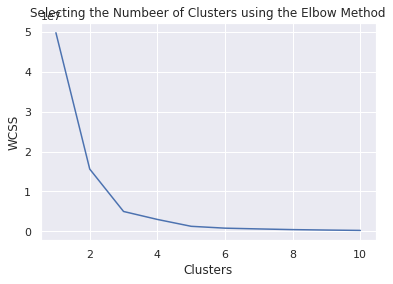

In [785]:
sns.set()
plt.plot(range(1, 11), wcss) 
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [786]:
X = df_oversampled.iloc[:, :-1]
Y = df_oversampled.iloc[:, -1]

In [787]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [788]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [789]:
from sklearn.model_selection import train_test_split
x_train_orig, x_test_orig, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [790]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train_orig)
x_test = sc.fit_transform(x_test_orig)

### KNN model

In [791]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)
pred=knn.predict(x_test) 
test_accuracy=accuracy_score(y_test,pred)*100
s4.append(test_accuracy)
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy))

Accuracy for our testing dataset with tuning is : 93.89%


In [792]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       240
           1       0.89      1.00      0.94       218

    accuracy                           0.94       458
   macro avg       0.94      0.94      0.94       458
weighted avg       0.95      0.94      0.94       458



### Naive Bayes

In [793]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [794]:
pred = nb_classifier.predict(x_test)

In [795]:
print(confusion_matrix(y_test, pred))

[[213  27]
 [121  97]]


In [796]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.64      0.89      0.74       240
           1       0.78      0.44      0.57       218

    accuracy                           0.68       458
   macro avg       0.71      0.67      0.65       458
weighted avg       0.71      0.68      0.66       458



In [797]:
pred_train = nb_classifier.predict(x_train)

In [798]:
test_accuracy=accuracy_score(y_test,pred)*100
s4.append(test_accuracy)

In [799]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 0.6768558951965066
Accuracy score on training data: 0.6825842696629213


### Logistic Regression

In [800]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [801]:
pred = log_reg.predict(x_test)

In [802]:
print(confusion_matrix(y_test, pred))

[[207  33]
 [ 26 192]]


In [803]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       240
           1       0.85      0.88      0.87       218

    accuracy                           0.87       458
   macro avg       0.87      0.87      0.87       458
weighted avg       0.87      0.87      0.87       458



In [804]:
pred_train = log_reg.predict(x_train)

In [805]:
test_accuracy=accuracy_score(y_test,pred)*100
s4.append(test_accuracy)

In [806]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 0.87117903930131
Accuracy score on training data: 0.9456928838951311


### Random Forest

In [807]:
from sklearn.ensemble import RandomForestClassifier
cf = RandomForestClassifier(n_estimators = 100, random_state = 42)
cf.fit(x_train, y_train);

In [808]:
pred = cf.predict(x_test)

In [809]:
print(confusion_matrix(y_test, pred))

[[240   0]
 [196  22]]


In [810]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       240
           1       1.00      0.10      0.18       218

    accuracy                           0.57       458
   macro avg       0.78      0.55      0.45       458
weighted avg       0.76      0.57      0.46       458



In [811]:
pred_train = cf.predict(x_train)

In [812]:
test_accuracy = accuracy_score(y_test, pred)*100
s4.append(test_accuracy)

In [813]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 0.5720524017467249
Accuracy score on training data: 1.0


### CNN

In [814]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [815]:
def trainModel(model, epochs, optimizer):
  batchsize = 25
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
  return model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=epochs, batch_size=batchsize)

In [816]:
def validate(history):
  print("Validation Accuracy",max(history.history["val_accuracy"]))
  pd.DataFrame(history.history).plot(figsize=(12,6))
  plt.show()

In [817]:
model=Sequential([
    Dense(512,activation='relu',input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax'),
])
print(model.summary())
model_history = trainModel(model=model,epochs=32,optimizer='adam')

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 512)               15872     
                                                                 
 dropout_104 (Dropout)       (None, 512)               0         
                                                                 
 dense_131 (Dense)           (None, 256)               131328    
                                                                 
 dropout_105 (Dropout)       (None, 256)               0         
                                                                 
 dense_132 (Dense)           (None, 128)               32896     
                                                                 
 dropout_106 (Dropout)       (None, 128)               0         
                                                                 
 dense_133 (Dense)           (None, 64)              

In [818]:
test_loss,test_accuracy = model.evaluate(x_test,y_test,batch_size=128)
print("Test Loss is : ",test_loss)
print("Test Accuracy is : ",test_accuracy)

4/4 [==============================] - 0s 6ms/step - loss: 0.0042 - accuracy: 0.9978
Test Loss is :  0.004224283155053854
Test Accuracy is :  0.9978166222572327


In [819]:
test_accuracy=test_accuracy*100
s4.append(test_accuracy)

## Systematic Sampling

In [820]:
def systematic_sampling(df, step):
 
    indexes = np.arange(0, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

In [821]:
df_systematic_sample = systematic_sampling(df_oversampled, 3)

In [822]:
df_systematic_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
12,10,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0


In [823]:
df_systematic_sample["Class"].value_counts()

0    255
1    254
Name: Class, dtype: int64

In [824]:
X = df_systematic_sample.iloc[:, :-1]
Y = df_systematic_sample.iloc[:, -1]

In [825]:
from sklearn.model_selection import train_test_split
x_train_orig, x_test_orig, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [826]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train_orig)
x_test = sc.fit_transform(x_test_orig)

### KNN model

In [827]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)
pred=knn.predict(x_test) 
test_accuracy=accuracy_score(y_test,pred)*100
s5.append(test_accuracy)
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy))

Accuracy for our testing dataset with tuning is : 82.35%


In [828]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        75
           1       0.74      1.00      0.85        78

    accuracy                           0.82       153
   macro avg       0.87      0.82      0.82       153
weighted avg       0.87      0.82      0.82       153



### Naive Bayes

In [829]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [830]:
pred = nb_classifier.predict(x_test)

In [831]:
print(confusion_matrix(y_test, pred))

[[73  2]
 [31 47]]


In [832]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.70      0.97      0.82        75
           1       0.96      0.60      0.74        78

    accuracy                           0.78       153
   macro avg       0.83      0.79      0.78       153
weighted avg       0.83      0.78      0.78       153



In [833]:
pred_train = nb_classifier.predict(x_train)

In [834]:
test_accuracy=accuracy_score(y_test,pred)*100
s5.append(test_accuracy)

In [835]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 0.7843137254901961
Accuracy score on training data: 0.7584269662921348


### Logistic Regression

In [836]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [837]:
pred = log_reg.predict(x_test)

In [838]:
print(confusion_matrix(y_test, pred))

[[65 10]
 [ 2 76]]


In [839]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        75
           1       0.88      0.97      0.93        78

    accuracy                           0.92       153
   macro avg       0.93      0.92      0.92       153
weighted avg       0.93      0.92      0.92       153



In [840]:
pred_train = log_reg.predict(x_train)

In [841]:
test_accuracy=accuracy_score(y_test,pred)*100
s5.append(test_accuracy)

In [842]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 0.9215686274509803
Accuracy score on training data: 0.9438202247191011


### Random Forest

In [843]:
from sklearn.ensemble import RandomForestClassifier
cf = RandomForestClassifier(n_estimators = 100, random_state = 42)
cf.fit(x_train, y_train);

In [844]:
pred = cf.predict(x_test)

In [845]:
print(confusion_matrix(y_test, pred))

[[75  0]
 [17 61]]


In [846]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        75
           1       1.00      0.78      0.88        78

    accuracy                           0.89       153
   macro avg       0.91      0.89      0.89       153
weighted avg       0.91      0.89      0.89       153



In [847]:
pred_train = cf.predict(x_train)

In [848]:
test_accuracy = accuracy_score(y_test, pred)*100
s5.append(test_accuracy)

In [849]:
print(f"Accuracy score on testing data: {accuracy_score(y_test, pred)}")
print(f"Accuracy score on training data: {accuracy_score(y_train, pred_train)}")

Accuracy score on testing data: 0.8888888888888888
Accuracy score on training data: 1.0


### CNN

In [850]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [851]:
def trainModel(model, epochs, optimizer):
  batchsize = 128
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
  return model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=epochs, batch_size=batchsize)

In [852]:
def validate(history):
  print("Validation Accuracy",max(history.history["val_accuracy"]))
  pd.DataFrame(history.history).plot(figsize=(12,6))
  plt.show()

In [853]:
model=Sequential([
    Dense(512,activation='relu',input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax'),
])
print(model.summary())
model_history = trainModel(model=model,epochs=200,optimizer='adam')

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 512)               15872     
                                                                 
 dropout_108 (Dropout)       (None, 512)               0         
                                                                 
 dense_136 (Dense)           (None, 256)               131328    
                                                                 
 dropout_109 (Dropout)       (None, 256)               0         
                                                                 
 dense_137 (Dense)           (None, 128)               32896     
                                                                 
 dropout_110 (Dropout)       (None, 128)               0         
                                                                 
 dense_138 (Dense)           (None, 64)              

In [854]:
test_loss,test_accuracy = model.evaluate(x_test,y_test,batch_size=128)
print("Test Loss is : ",test_loss)
print("Test Accuracy is : ",test_accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.1152 - accuracy: 0.9869
Test Loss is :  0.11522568762302399
Test Accuracy is :  0.9869281053543091


In [855]:
test_accuracy=test_accuracy*100
s5.append(test_accuracy)

## Comparing all sampling techniques

In [856]:
df_sample_comparison = pd.DataFrame(list(zip(s1,s2,s3,s4,s5)), index = ["M1","M2","M3","M4","M5"], columns = ["S1","S2","S3","S4","S5"])

In [857]:
df_sample_comparison

,S1,S2,S3,S4,S5
M1,81.896552,85.869565,94.594595,93.886463,82.352941
M2,63.793103,73.913043,79.279279,67.685590,78.431373
M3,89.655172,90.217391,97.297297,87.117904,92.156863
M4,100.000000,98.913043,79.279279,57.205240,88.888889
M5,99.137932,89.130437,100.000000,99.781662,98.692811


# Conclusion

The dataset provided was highly imbalanced. To make it a balanced I used overampling on the minority class and then proceeded to create samples.


The 5 sampling techniques used were : 


*   Simple Random Sampling
*   Stratified Sampling
*   Cluster Sampling (by taking clusters on the basis of the Time column)
*   Cluster Sampling (by taking clusters on the basis of the Amount Column using K-Means Clustering)
*   Systematic Sampling

The 5 models used were :
*   KNN
*   Naive Bayes
*   Logistic Regression
*   Random Forest Classifier
*   CNN

On comparing the five models on the five samples we can conclude that :
The top 3 most optimal models are :
* With a **100%** accuracy
 * The Random Forest Classifier model on the sample created using Simple Random Sampling.
 * The CNN model on the sample created using Clustering Sampling technique where clusters were created on the basis of Time.
* The CNN model on the sample created using Clustering Sampling technique where clusters were created on the basis of Amount with  a **99.781662%** accuracy.
* The CNN model on the sample created using Simple Random Sampling with a **99.137932%** accuracy


The 3 worst models are :
* The Random Forest Classifier model on the sample created using Clustering Sampling technique where clusters were created on the basis of Amount with  a **57.205240%** accuracy.
* The Naive Bayes model on the sample created using Simple Random Sampling with a **63.793103%** accuracy.
* The Naive Bayes model on the sample created using Clustering Sampling technique where clusters were created on the basis of Amount with  a **67.685590%** accuracy.











